In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm.auto import tqdm


In [2]:
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def rosenbrock_grad(params):
    x, y = params[0], params[1]
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return torch.tensor([dx, dy])

In [3]:
def heavy_ball_gd(learning_rate, beta, max_iter, initial_params, epsilon=1e-4):
  # inicialização
  hyperparams = initial_params.clone().detach().requires_grad_(True)

  hyperparams_history = [hyperparams.detach().clone()]
  loss_history_hb = []
  previous_hyperparams = hyperparams.detach().clone() 



  for i in tqdm(range(max_iter)):
    if hyperparams.grad is not None:
      hyperparams.grad.zero_()

    # forward
    loss = rosenbrock(hyperparams[0], hyperparams[1])
    loss_history_hb.append(loss)

    # backward

    loss.backward()

    with torch.no_grad():
      current_hyperparams = hyperparams.clone()

      heavy_ball_momentum = beta * (hyperparams - previous_hyperparams)

      hyperparams -= learning_rate * hyperparams.grad - heavy_ball_momentum

      previous_hyperparams = current_hyperparams

    hyperparams_history.append(hyperparams.detach().clone())

    if torch.norm(hyperparams.grad) < epsilon:
      print(f"convergiu após {i + 1} iterações com learning rate de {learning_rate} e beta {beta}")
      print(f"Ponto final: {hyperparams[0]}, {hyperparams[1]}")
      print(f"Valor Rosenbrock: {rosenbrock(hyperparams[0], hyperparams[1])}")
      print(f"Erro: {loss}")
      break
  return torch.stack(hyperparams_history), loss_history_hb, i + 1


  0%|          | 0/500000 [00:00<?, ?it/s]

convergiu após 127555 iterações com learning rate de 0.0001 e beta 0.1
Ponto final: 0.9988970756530762, 0.9977905750274658
Valor Rosenbrock: 1.218715851791785e-06
Erro: 1.218847387463029e-06


  0%|          | 0/500000 [00:00<?, ?it/s]

convergiu após 69570 iterações com learning rate de 0.0001 e beta 0.5
Ponto final: 0.9988848567008972, 0.997766375541687
Valor Rosenbrock: 1.2456509921321413e-06
Erro: 1.2459169056455721e-06


  0%|          | 0/500000 [00:00<?, ?it/s]

convergiu após 14169 iterações com learning rate de 0.0001 e beta 0.9
Ponto final: 1.001064419746399, 1.0021336078643799
Valor Rosenbrock: 1.134268359237467e-06
Erro: 1.135537559093791e-06


  0%|          | 0/500000 [00:00<?, ?it/s]

convergiu após 6621 iterações com learning rate de 0.0001 e beta 0.96
Ponto final: 1.0010814666748047, 1.0021686553955078
Valor Rosenbrock: 1.1716222161339829e-06
Erro: 1.1757147149182856e-06


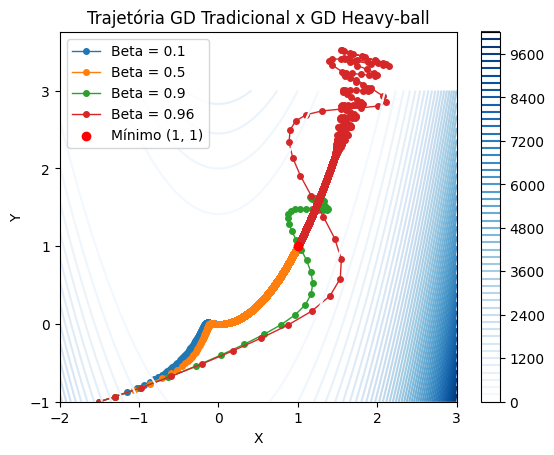

In [4]:
learning_rate_gd = 0.001661
# learning_rate_hb = 0.0009168
learning_rate_hb = 0.0001
max_iter = 500000
# beta = 0.96
beta = [0.1, 0.5, 0.9, 0.96]
epsilon = 1e-3
initial_params = torch.Tensor([-1.5, -1])
loss_history_hb = None

# hyperparams_history_gd, loss_history_gd, num_iters_gd = gradient_descent(learning_rate=learning_rate_gd, max_iter=max_iter, initial_params=initial_params, epsilon=epsilon)
for b in beta:
  hyperparams_history_heavy_ball, loss_history_hb, num_iters_hb = heavy_ball_gd(learning_rate=learning_rate_hb, beta=b, max_iter=max_iter, initial_params=initial_params, epsilon=epsilon)
  # plt.semilogy(range(num_iters_hb), loss_history_hb, label=f"Beta = {b}", linewidth=1)

  plt.plot(hyperparams_history_heavy_ball.numpy()[:, 0], hyperparams_history_heavy_ball.numpy()[:, 1], marker='o', linestyle='-', label=f"Beta = {b}", markersize=4, linewidth=1)



# hyperparams_history_gd, num_iters_gd = gradient_descent(learning_rate=learning_rate_gd, max_iter=max_iter, initial_params=initial_params, epsilon=epsilon)
# hyperparams_history_heavy_ball, loss_history_hb, num_iters_hb = heavy_ball_gd(learning_rate=learning_rate_hb, beta=beta, max_iter=max_iter, initial_params=initial_params, epsilon=epsilon)

x_values = np.linspace(-2,3, 100)
y_values = np.linspace(-1, 3, 100)

x, y = np.meshgrid(x_values, y_values)

z = rosenbrock(x, y)
plt.contour(x, y, z, levels=50, cmap='Blues')
plt.colorbar()

# plt.plot(hyperparams_history_heavy_ball.numpy()[:, 0], hyperparams_history_heavy_ball.numpy()[:, 1], marker='o', linestyle='-', color='orange', label='Heavy Ball Gradient Descent', markersize=4, linewidth=1)
# plt.plot(hyperparams_history_gd.numpy()[:, 0], hyperparams_history_gd.numpy()[:, 1], marker='o', linestyle='-', color='purple', label='Gradient Descent', markersize=4, linewidth=2)
plt.scatter([1.0], [1.0], color='red', zorder=5, label='Mínimo (1, 1)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Trajetória GD Tradicional x GD Heavy-ball')
plt.legend()


# plt.xlabel("Número de Iterações")
# plt.ylabel("f(xk)")
# plt.title("Convergência GD vs Heavy-ball GD")
# plt.legend()
# plt.grid(True, alpha=0.3, linestyle='--')
# plt.ylim(bottom=1e-3, top = 1e4)
# plt.xlim(right=399)

plt.show()
